# What is Quantum Computing?
 - Classical physics failed to describe the behavior of small things in a laboratory which was overcomed by Quantum Physics.
 - Quantum theory explains this behavior and gives us a more complete picture of our universe.
 - Quantum computing is the perfect way to dip your toes into quantum physics.
 

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from numpy.random import randint
import numpy as np
# from qiskit.compiler import transpile, assemble
# from qiskit.tools.jupyter import *
# from qiskit.visualization import *
# Loading your IBM Q account(s)
# provider = IBMQ.load_account()

### Representing Qubit states
- Classical bits are well defined having state either 0 or 1.
- In quantum model vectors represent the qubit states.
- A simple notation of 0 and 1 in quantum:
- It is also called as Dirac notation.
- <0|1> in general form is called as bra-ket where <0| is bra(row vector) and |1> is ket(Column vector).

![0 1 state](assets/0_1_state.png)

In [2]:
qc = QuantumCircuit(1)  # quantum circuit with one qubit
initial_state = [0,1]   # Initial_state as |1>
qc.initialize(initial_state, 0) # Initialisation operation to the 0th qubit
qc.draw('text')

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

### Single Qubit Gates
- Pauli X,Y,Z gates
- Hadamard gate 
- X,Y,Z bases
- Note - Initial base is Z and the initial qubit is 0. For the case below we have set it to 1.

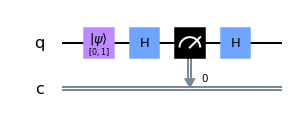

In [3]:
# Changing to X base from the common Z base.
# Create the X-measurement function:
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

# Initialise our qubit and measure it
qc = QuantumCircuit(1,1) # quantum circuit with one qubit and 1 classical bit
initial_state = [0,1] #Initial_state as |1>
initializer = qc.initialize(initial_state,0)
x_measurement(qc, 0, 0)
qc.draw()

### Why Quantum?
- Big(O)
- RSA 250 - 829 bit number takes 2700 core years for factorization.


In [4]:
rsa_250 = 2140324650240744961264423072839333563008614715144755017797754920881418023447140136643345519095804679610992851872470914587687396261921557363047454770520805119056493106687691590019759405693457452230589325976697471681738069364894699871578494975937497937

# What is Cryptography?
- Cryptography is the science of data encryption with number theory at it's core.
- Symmetric key cryptography ( common key between the sender and receiver ) eg.Ceaser-cypher.
- Various Modern algorithms (RSA,MD5,SHA-1)

![symmetric_key](assets/symmetrickey.png)

 # What is Quantum Cryptography?
 - Applying the concepts of Quantum mechanics with cryptography.
 - [BB84](https://www.quanta.guru/docs/cryptography/cryptography/) protocol for communication in quantum channel.

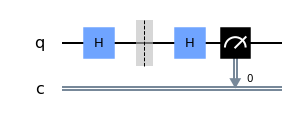

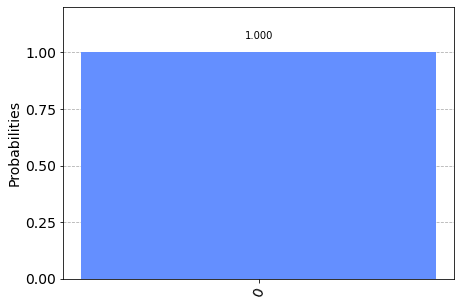

In [5]:
# Protocol overview without Interception
qc = QuantumCircuit(1,1)
# Shaya prepares qubit in state |+>
qc.h(0)
qc.barrier()
# Shaya now sends the qubit to Thomas
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
svs = Aer.get_backend('qasm_simulator')
job = execute(qc, svs)
qiskit.visualization.plot_histogram(job.result().get_counts())


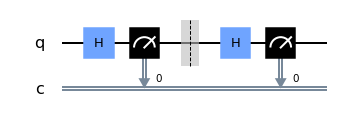

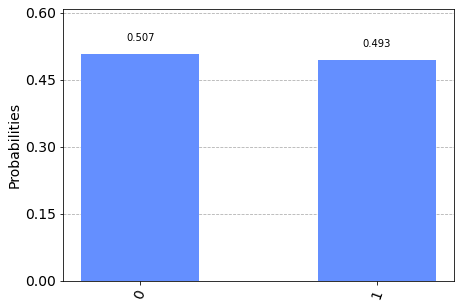

In [6]:
# Protocol overview with Interception
qc = QuantumCircuit(1,1)
# Adam prepares qubit in state |+>
qc.h(0)
# Adam now sends the qubit to Brian
# but Eva intercepts and tries to read it
qc.measure(0, 0)
qc.barrier()
# Eva then passes this on to Brian
# who measures it in the X-basis
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
svs = Aer.get_backend('qasm_simulator')
job = execute(qc, svs)
qiskit.visualization.plot_histogram(job.result().get_counts())


## Real application
- Message being conveyed from Adam to Brian with Eva in communication channel:
    - Without Interception
    - With Interception

In [7]:
# Necessary Functions

def encode_message(bits, bases):
    '''Creating an encoding function
        @bits - message in bits
        @bases - Quantum gates
        returns message'''
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # Prepare qubit in Z-basis
            if bits[i] == 0:
                pass 
            else:
                qc.x(0)
        else: # Prepare qubit in X-basis
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

def measure_message(message, bases):
    '''Measuring the computation from the 
        @message - message bits
        @bases - quantum gates
        returns measurements'''
    backend = Aer.get_backend('qasm_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
        result = execute(message[q], backend, shots=1, memory=True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

def remove_garbage(a_bases, b_bases, bits):
    '''Discards the uncommon bases
        @a_bases - Adam's base
        @b_bases - Brian's base
        @bits - Message
        returns good_bits'''
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bits[q])
    return good_bits

def sample_bits(bits, selection):
    '''Measures the random sample bits
        @bits - Message
        @selection - good_bits
        returns sample'''
    sample = []
    for i in selection:
        # use np.mod to make sure the
        # bit we sample is always in 
        # the list range
        i = np.mod(i, len(bits))
        # pop(i) removes the element of the
        # list at index 'i'
        sample.append(bits.pop(i))
    return sample


In [8]:
# Without Interception
np.random.seed(seed=0)
n = 100

## Step 1
# Adam generates bits
adam_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
adam_bases = randint(2, size=n)
message = encode_message(adam_bits, adam_bases)

## Step 3
# Decide which basis to measure in:
brian_bases = randint(2, size=n)
brian_results = measure_message(message, brian_bases)

## Step 4
adam_key = remove_garbage(adam_bases, brian_bases, adam_bits)
brian_key = remove_garbage(adam_bases, brian_bases, brian_results)

## Step 5
sample_size = 15
bit_selection = randint(n, size=sample_size)

brian_sample = sample_bits(brian_key, bit_selection)
print("brian_sample = " + str(brian_sample))
adam_sample = sample_bits(adam_key, bit_selection)
print("adam_sample = "+ str(adam_sample))
print(adam_sample==brian_sample)
#print("key length = %i" % len(adam_key))

brian_sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
adam_sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
True


In [9]:
# With Interception
np.random.seed(seed=3)
## Step 1
adam_bits = randint(2, size=n)
## Step 2
adam_bases = randint(2, size=n)
message = encode_message(adam_bits, adam_bases)
## Interception!!
eva_bases = randint(2, size=n)
intercepted_message = measure_message(message, eva_bases)
## Step 3
brian_bases = randint(2, size=n)
brian_results = measure_message(message, brian_bases)
## Step 4
brian_key = remove_garbage(adam_bases, brian_bases, brian_results)
adam_key = remove_garbage(adam_bases, brian_bases, adam_bits)
## Step 5
sample_size = 15
bit_selection = randint(n, size=sample_size)
brian_sample = sample_bits(brian_key, bit_selection)
print("brian_sample = " + str(brian_sample))
adam_sample = sample_bits(adam_key, bit_selection)
print("adam_sample = "+ str(adam_sample))
print(adam_sample==brian_sample)

brian_sample = [1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]
adam_sample = [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
False


## Risk Analysis
Lower the qubits lower is the chance of getting caught while intercepting and Vice versa.

In [11]:
n = 100
# Step 1
adam_bits = randint(2, size=n)
adam_bases = randint(2, size=n)
# Step 2
message = encode_message(adam_bits, adam_bases)
# Interception!
eva_bases = randint(2, size=n)
intercepted_message = measure_message(message, eva_bases)
# Step 3
brian_bases = randint(2, size=n)
brian_results = measure_message(message, brian_bases)
# Step 4
brian_key = remove_garbage(adam_bases, brian_bases, brian_results)
adam_key = remove_garbage(adam_bases, brian_bases, adam_bits)
# Step 5
sample_size = 5 # Change this to something lower and see if 
                 # Eva can intercept the message without adam
                 # and brian finding out
bit_selection = randint(n, size=sample_size)
brian_sample = sample_bits(brian_key, bit_selection)
adam_sample = sample_bits(adam_key, bit_selection)

if brian_sample != adam_sample:
    print("Eva's interference was detected.")
else:
    print("Eva went undetected!")

Eva's interference was detected.


### Thanks to Qiskit for such an amazing explaination of concepts.
You can read more [here](https://qiskit.org/textbook/what-is-quantum.html).